**Project Kelompok 5 TelU-01 Microcredensial Associate Data Scientist:**


*   Armadhani Hiro Juni Permana
*   David Kevin Handel Hutabarat 
*   Yunata Putra Gunawan 



#**Akuisisi Data**

Data diakuisisi dari https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#
Data ini merupakan data record gagal jantung. Data ini terdiri atas 299 observasi dan 13 atribut.
Deskripsi dari setiap atribut adalah sebagai berikut:
1. age : umur pasien (integer)
2. anaemia : kondisi tubuh kekurangan sel darah merah (boolean: 1 (True) atau 0 (No))
3. high_blood_pressure : pasien memiliki tekanan darah tinggi (boolean: 1 (True) atau 0 (False))
4. creatinine_phosphokinase (CPK) : kadar enzim CPK di dalam darah (integer)
5. diabetes : pasien memiliki diabetes (boolean: 1 (True) atau 0 (False))
6. ejection_fraction : banyak darah yang dipompakan keluar melalui jantung dalam setiap kontraksinya (float: persentasi)
7. platelets : trombosit/keping darah (float: kiloplatelets/mL)
8. sex : jenis kelamin (Boolean: 1 (Laki-laki) atau 0 (Perempuan))
9. serum_creatinine : kadar kreatinin di dalam darah (float: mg/dL)
10. serum_sodium : kadar sodium di dalam darah (float: mEQ/L)
11. smoking : pasien merokok (Boolean: 1 (True) atau 0 (False)
12. time : periode follow-up (Hari)
13. DEATH_EVENT : kematian (Boolean: 1 (True) atau 0 (False))

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from scipy.stats import norm, skew, boxcox
from collections import Counter

#Mengimpor Data menggunakan Gdrive

In [ ]:
!gdown --id 1AEpO2omCTByqZMtEdRsjvgdvXafeoM09

Downloading...
From: https://drive.google.com/uc?id=1AEpO2omCTByqZMtEdRsjvgdvXafeoM09
To: /content/heart_failure_clinical_records_dataset.csv
100% 12.2k/12.2k [00:00<00:00, 20.0MB/s]


# Menampilkan 5 Data Teratas pada Dataset

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **Eksplorasi Data**



In [ ]:
# Menampilkan ukuran dataset
df.shape

(299, 13)

In [ ]:
# Menampilkan info umum dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dari tampilan di atas, diketahui tidak terdapat data kosong atau *missing values*

In [ ]:
# Menampilkan Statistika Deskriptif dari Dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## **Mencari Data Pencilan**

In [ ]:
def mencari_pencilan(df,fitur):
    indeks_pencilan = []
    
    for c in fitur:
        # Kuartil Pertama
        Q1 = np.percentile(df[c],25)
        # Kuartil Ketiga
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Jarak Antar Kuartil
        jarak_kuartil = IQR * 1.5
        # Mencari Pencilan
        list_pencilan = df[(df[c] < Q1 - jarak_kuartil) | (df[c] > Q3 + jarak_kuartil)].index
        # Menyimpan Indeks
        indeks_pencilan.extend(list_pencilan)
        
    indeks_pencilan = Counter(indeks_pencilan)
    hasil_pencilan = list(i for i, v in indeks_pencilan.items() if v > 1) 
    
    return hasil_pencilan

In [ ]:
df.loc[mencari_pencilan(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df = df.drop(mencari_pencilan(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
285,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
286,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
287,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


##**Feature Engineering**

####Skewness

In [ ]:
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



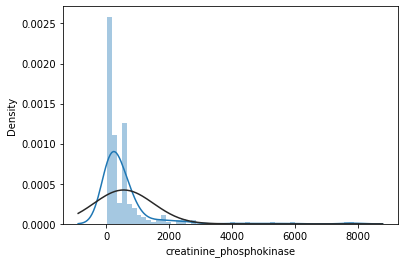

mu creatinine_phosphokinase : 553.121107266436, sigma creatinine_phosphokinase : 943.411428667967



In [ ]:
# creatinine_phosphokinase
sns.distplot(df["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

In [ ]:
df["creatinine_phosphokinase"], lam = boxcox(df["creatinine_phosphokinase"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



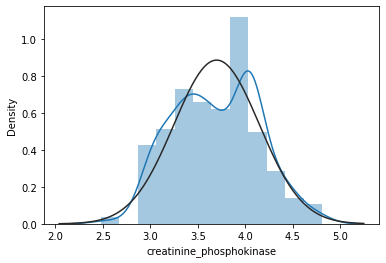

mu creatinine_phosphokinase : 3.698843171315633, sigma creatinine_phosphokinase : 0.4504255141000855



In [ ]:
# creatinine_phosphokinase
sns.distplot(df["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



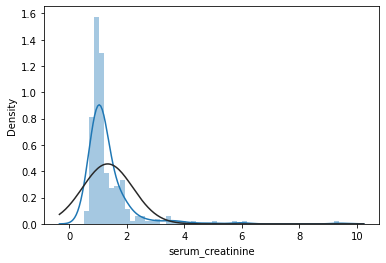

mu serum_creatinine : 1.333114186851211, sigma serum_creatinine : 0.8748528244624999



In [ ]:
# serum_creatinine
sns.distplot(df["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

In [ ]:
df["serum_creatinine"], lam_serum_creatine = boxcox(df["serum_creatinine"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



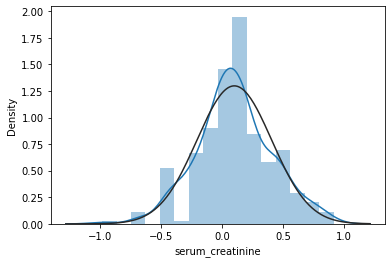

mu serum_creatinine : 0.10109147159013519, sigma serum_creatinine : 0.3073176761803753



In [ ]:
# serum_creatinine
sns.distplot(df["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



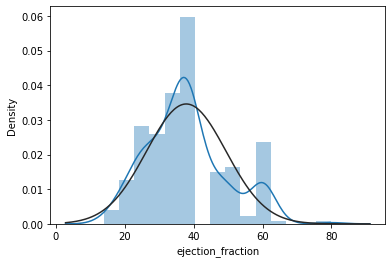

mu ejection_fraction : 37.8719723183391, sigma smejection_fractionoking : 11.526149444782293



In [ ]:
# ejection_fraction
sns.distplot(df["ejection_fraction"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["ejection_fraction"])
print("mu {} : {}, sigma {} : {}".format("ejection_fraction", mu, "smejection_fractionoking", sigma))
print()

In [ ]:
df["ejection_fraction"], lam_serum_creatine = boxcox(df["ejection_fraction"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



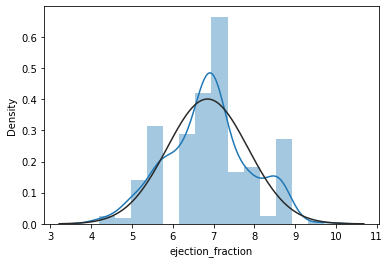

mu ejection_fraction : 6.8528622136803135, sigma smejection_fractionoking : 0.9951607969085129



In [ ]:
# ejection_fraction
sns.distplot(df["ejection_fraction"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["ejection_fraction"])
print("mu {} : {}, sigma {} : {}".format("ejection_fraction", mu, "smejection_fractionoking", sigma))
print()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



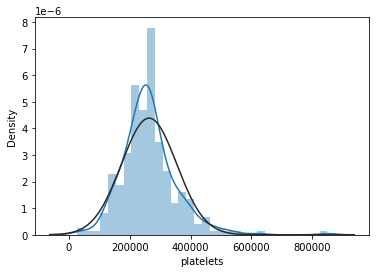

mu platelets : 263597.55266435986, sigma platelets : 90929.19587502987



In [ ]:
# platelets
sns.distplot(df["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [ ]:
df["platelets"], lam_serum_creatine = boxcox(df["platelets"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



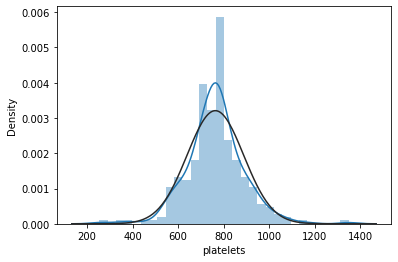

mu platelets : 763.3363077948457, sigma platelets : 124.37245302525076



In [ ]:
# platelets
sns.distplot(df["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(df["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [ ]:
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness_new = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness_new

,skewed
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
age,0.413840
diabetes,0.358569
anaemia,0.286636
platelets,0.153154
time,0.125442
creatinine_phosphokinase,0.038332
serum_creatinine,-0.005096


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



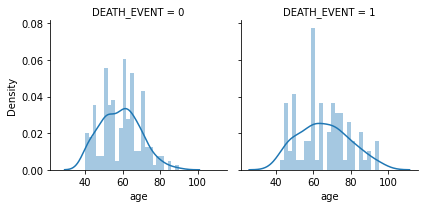

In [ ]:
#AGE
g = sns.FacetGrid(df, col = "DEATH_EVENT")
g.map(sns.distplot, "age", bins = 25)
plt.show()

# Visualisasi Distribusi Umur

In [ ]:
fig = px.histogram(df, x="age", color_discrete_sequence=['#FE6F5E'])
fig.update_layout(
    title_text='Histogram Distribusi Umur', # judul plot
    xaxis_title_text='Umur', # judul sumbu x
    yaxis_title_text='Jumlah', # judul sumbu y
    bargap=0.05, # jarak antara tiap batang yang berdekatan
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribusi Umur vs Kematian", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

# Visualisasi Distribusi Enzim CPK

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['creatinine_phosphokinase'],
    xbins=dict( # bin yang digunakan untuk histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='HISTOGRAM DISTRIBUSI ENZIM CREATININE PHOSPHOKINASE',
    xaxis_title_text='KADAR CREATININE PHOSPHOKINASE',
    yaxis_title_text='JUMLAH', 
    bargap=0.05, # jarak antara tiap batang yang berdekatan
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="DISTRIBUSI ENZIM CPK vs KEMATIAN", 
                   labels={"creatinine_phosphokinase": "KADAR CREATININE PHOSPHOKINASE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

# Visualisasi Distribusi Ejection Fraction

In [ ]:
fig = px.histogram(df, x="ejection_fraction", color_discrete_sequence=['#FE6F5E'])
fig.update_layout(
    title_text='HISTOGRAM DISTRIBUSI EJECTION FRACTION', # judul plot
    xaxis_title_text='Ejection Fraction', # judul sumbu x
    yaxis_title_text='Jumlah', # judul sumbu y
    bargap=0.05, # jarak antara tiap batang yang berdekatans
    template = 'plotly_dark'
)

fig.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="DISTRIBUSI EJECTION FRACTION vs KEMATIAN", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

# Histogram Distribusi Trombosit

In [ ]:
fig = px.histogram(df, x="platelets", color_discrete_sequence=['#FE6F5E'])
fig.update_layout(
    title_text='HISTOGRAM DISTRIBUSI TROMBOSIT', 
    xaxis_title_text='Trombosit', 
    yaxis_title_text='Jumlah', 
    bargap=0.05,
    template = 'plotly_dark'
)

fig.show()

In [ ]:
fig = px.histogram(df, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="DISTRIBUSI TROMBOSIT VS KEMATIAN", 
                   labels={"platelets": "TROMBOST"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

# Visualisasi Distribusi Serum Sodium

In [ ]:
fig = px.histogram(df, x="serum_sodium", color_discrete_sequence=['#FE6F5E'])
fig.update_layout(
    title_text='HISTOGRAM DISTRIBUSI SERUM SODIUM', 
    xaxis_title_text='Trombosit', 
    yaxis_title_text='Jumlah', 
    bargap=0.05,
    template = 'plotly_dark'
)

In [ ]:
fig = px.histogram(df, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=df.columns,
                   title ="DISTRIBUSI SERUM SODIUM vs KEMATIAN", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

# Visualisasi Pie Chart Distribusi Jenis Kelamin

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Laki-laki","Perempuan"]
label2 = ['Laki-laki - Hidup','Laki-laki - Meninggal', "Perempuan -  Hidup", "Perempuan - Hidup"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Jenis Kelamin"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="Jenis Kelamin vs Kematian"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="Distribusi Jenis Kelamin  \
                                                        Jenis Kelamin vs Kematian",
    annotations=[dict(text='Jenis Kelamin', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='Jenis Kelamin vs Kematian', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

# Visualisasi Pie Chart Distribusi Diabetes

In [ ]:
d1 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==0)]
d2 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==1)]
d3 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==1)]

label1 = ["Tanpa Diabetes","Diabetes"]
label2 = ['Tanpa Diabetes - Hidup','Diabetes - Hidup', "Tanpa Diabetes -  Meninggal", "Diabetes  - Meninggal"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="Diabetes"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="Diabetes vs Kematian"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DISTRIBUSI DIABETES \
                                                          DIABETES vs KEMATIAN",
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES vs KEMATIAN', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

# Visualisasi Pie Chart Distribusi Anemia

In [ ]:
d1 = df[(df["DEATH_EVENT"]==0) & (df["anaemia"]==0)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["anaemia"]==0)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["anaemia"]==1)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["anaemia"]==1)]

label1 = ["Tanpa Anemia","Anemia"]
label2 = ['Tanpa Anemia - Hidup','Tanpa Anemia - Meninggal', "Anemia -  Hidup", "Anemia  - Meninggal"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Membuat subplots: Gunakan tipe 'domain' untuk subplot pie
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANEMIA VS KEMATIAN"),
              1, 2)

# Gunakan `hole` untuk membuat pie chart mirip donat
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DISTRIBUSI ANEMIA \
                                                        ANEMIA VS KEMATIAN",
    # Menambahkan anotasi di tengah pie chart.
    annotations=[dict(text='ANEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANEMIA VS KEMATIAN', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()


# Visualisasi Pie Chart Distribusi Tekanan Darah Tinggi

In [ ]:
d1 = df[(df["DEATH_EVENT"]==0) & (df["high_blood_pressure"]==0)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["high_blood_pressure"]==0)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["high_blood_pressure"]==1)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["high_blood_pressure"]==1)]

label1 = ["Tanpa Tekanan Darah Tinggi","Tekanan Darah Tinggi"]
label2 = ['Tanpa Tekanan Darah Tinggi - Hidup','Tanpa Tekanan Darah Tinggi - Meninggal', "Tekanan Darah Tinggi -  Hidup", "Tekanan Darah Tinggi  - Meninggal"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Membuat subplots: Gunakan tipe 'domain' untuk subplot pie
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Gunakan `hole` untuk membuat pie chart mirip donat
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DISTRIBUSI TEKANAN DARAH TINGGI \
                          TEKANAN DARAH TINGGI VS KEMATIAN",
    # Menambahkan anotasi di tengah pie chart.
    annotations=[dict(text='Tekanan Darah Tinggi', x=0.15, y=0.5, font_size=10, showarrow=False),
                 dict(text='Tekanan Darah Tinggi', x=0.84, y=0.5, font_size=10, showarrow=False),
                 dict(text='VS Kematian', x=0.82, y=0.45, font_size=10, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

# Visualisasi Pie Chart Distribusi Merokok

In [ ]:
d1 = df[(df["DEATH_EVENT"]==0) & (df["smoking"]==0)]
d2 = df[(df["DEATH_EVENT"]==1) & (df["smoking"]==0)]
d3 = df[(df["DEATH_EVENT"]==0) & (df["smoking"]==1)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["smoking"]==1)]

label1 = ["Tidak Merokok","Merokok"]
label2 = ['Tidak Merokok - Hidup','Tidak Merokok - Meninggal', "Merokok - Hidup", "Merokok - Meninggal"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Membuat subplots: Gunakan tipe 'domain' untuk subplot pie
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="MEROKOK"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="MEROKOK VS KEMATIAN"),
              1, 2)

# Gunakan `hole` untuk membuat pie chart mirip donat
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DISTRIBUSI PERILAKU MEROKOK \
                                              MEROKOK VS KEMATIAN",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='MEROKOK', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='MEROKOK VS KEMATIAN', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

# Visualisasi Distribusi Umur VS Diabetes

In [ ]:
fig = px.histogram(df, x="age", color="diabetes", marginal="violin",hover_data=df.columns,
                   title ="DISTRIBUSI UMUR VS DIABETES", 
                   labels={"diabetes": "DIABETES", "age": "UMUR"},
                   template="plotly_dark")
fig.show()

# Visualisasi Distribusi Umur vs Anemia

In [ ]:
fig = px.histogram(df, x="age", color="anaemia", marginal="violin",hover_data=df.columns,
                   title ="DISTRIBUSI UMUR VS ANEMIA", 
                   labels={"anaemia": "ANEMIA", "age": "UMUR"},
                   template="plotly_dark")
fig.show()

# Visualisasi Distribusi Umur vs Tekanan Darah Tinggi

In [ ]:
fig = px.histogram(df, x="age", color="high_blood_pressure", marginal="violin",hover_data=df.columns,
                   title ="DISTRIBUSI UMUR VS TEKANAN DARAH TINGGI", 
                   labels={"high_blood_pressure": "TEKANAN DARAH TINGGI", "age": "UMUR"},
                   template="plotly_dark")
fig.show()

# Visualisasi Distribusi Umur vs Perilaku Merokok

In [ ]:
fig = px.histogram(df, x="age", color="smoking", marginal="violin",hover_data=df.columns,
                   title ="DISTRIBUSI UMUR VS PERILAKU MEROKOK", 
                   labels={"smoking": "PERILAKU MEROKOK", "age": "UMUR"},
                   template="plotly_dark")
fig.show()

Menampilkan Data pada Fitur time, ejection_fraction, dan serum_creatinine dengan DEATH_EVENT



In [ ]:
X = df.iloc[:, [4,7,11]].values
y = df.iloc[:,-1].values

In [ ]:
print(X)

In [ ]:
print(y)

##**MODEL**

Akan dicoba beberapa model, yaitu:
1.   Extreme Gradien Boosting (XGBoost)
2.   Random Forest
3.   Logistic Regression
4.   Desision Tree 
5.   Support Vector Machine (SVM)
6.   Cat Boost 

Lalu akan dievaluasi model terbaik dari 6 model tersebut



#Import Library

In [ ]:
from scipy import stats
from scipy.stats import norm, skew, boxcox
from collections import Counter

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

#XGBOOST
from xgboost import XGBClassifier

#warning
import warnings
warnings.filterwarnings('ignore')

##Memisahkan Data Fitur dan Data Target

In [ ]:
X = df.drop("DEATH_EVENT", axis = 1) #Data Fitur
y = df.DEATH_EVENT #Data Target

##Menerapkan SMOTE

Karena jumlah data antar label/target masih tidak seimbang (imbalance), maka dilakukan penyeimbangan data dengan teknik SMOTE

In [ ]:
print("Sebelum SMOTE")
y.value_counts()

In [ ]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
print("Setelah Smote")
y_sm.value_counts()

##Split Data Latih dan Data Uji

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = test_size, random_state = 42)

In [ ]:
# List kosong menyimpan hasil akurasi
result_acc = []

##XG Boost

In [ ]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, y_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
result_acc.append(acc_xgb)
print("HASIL")
print("Akurasi Model XGB : ", acc_xgb)
print("Confusion Matrix XGB : ", cm_xgb)

##Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
importance = RF.feature_importances_

# Plot Kepentingan Fitur
plt.bar([x for x in range(len(importance))], importance, color = "red")
plt.show()

In [ ]:
X_train_RF = X_train[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]
X_test_RF = X_test[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]

In [ ]:
RF = RandomForestClassifier(max_depth=7, random_state=25)
RF.fit(X_train_RF, y_train)
y_pred_RF = RF.predict(X_test_RF)
cm_RF = confusion_matrix(y_pred_RF, y_test)
acc_RF = accuracy_score(y_test, y_pred_RF)
result_acc.append(acc_RF)
print("HASIL")
print("Akurasi Model Random Forest : ", acc_RF)
print("Confusion Matrix Model Random Forest : ", cm_RF)

##Logistic Regression

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
importance = LogReg.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "orange")
plt.show()

In [ ]:
X_train_LogReg = X_train[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]
X_test_LogReg = X_test[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train_LogReg, y_train)
y_pred_LogReg = LogReg.predict(X_test_LogReg)
cm_LogReg = confusion_matrix(y_pred_LogReg, y_test)
acc_LogReg = accuracy_score(y_test, y_pred_LogReg)
result_acc.append(acc_LogReg)
print("HASIL")
print("Akurasi Model Logistic Regression : ", acc_LogReg)
print("Confusion Matrix Model Logistic Regression : ", cm_LogReg)

## Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
importance = DT.feature_importances_

plt.bar([x for x in range(len(importance))], importance, color = "blue")
plt.show()

In [ ]:
X_train_DT = X_train[["creatinine_phosphokinase","ejection_fraction","time"]]
X_test_DT = X_test[["creatinine_phosphokinase","ejection_fraction","time"]]

In [ ]:
DT_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20)}

DT = DecisionTreeClassifier()
clf = GridSearchCV(DT, param_grid=DT_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(X_train_DT, y_train)

y_pred_DT = clf.predict(X_test_DT)
cm_y_pred_DT = confusion_matrix(y_pred_DT, y_test)
acc_y_pred_DT = accuracy_score(y_test, y_pred_DT)
result_acc.append(acc_y_pred_DT)
print("HASIL")
print("Akurasi Model Decision Tree : ", acc_y_pred_DT)
print("Confusion Matrix Decision Tree: ", cm_y_pred_DT)

## Support Vector Machine

In [ ]:
SVM = SVC(kernel="linear")
SVM.fit(X_train, y_train)
importance = SVM.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "brown")
plt.show()

In [ ]:
X_train_SVM = X_train[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]
X_test_SVM = X_test[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]

In [ ]:
SVM = SVC()
SVM.fit(X_train_SVM, y_train)
y_pred_SVM = SVM.predict(X_test_SVM)
cm_SVM = confusion_matrix(y_pred_SVM, y_test)
acc_SVM = accuracy_score(y_test, y_pred_SVM)
result_acc.append(acc_SVM)
print("HASIL")
print("Akurasi Model SVM : ", acc_SVM)
print("Confusion Matrix SVM : ", cm_SVM)

## Cat Boost

In [ ]:
best_params = {'bagging_temperature': 0.8,
               'depth': 5,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.05,
               'random_strength': 0.8}

CB = CatBoostClassifier(
        **best_params,
        loss_function='Logloss',
        eval_metric='Accuracy',         
        nan_mode='Min',
        verbose=False
    )

CB.fit(X_train, y_train,
       verbose_eval=100, 
       early_stopping_rounds=50,
       eval_set=(X_test, y_test),
       use_best_model=False,
       plot=True)

y_pred_CB = CB.predict(X_test)

cm_CB = confusion_matrix(y_pred_CB, y_test)
acc_CB = accuracy_score(y_test, y_pred_CB)
result_acc.append(acc_CB)
print("HASIL")
print("Akurasi Model Cat Boost : ", acc_CB)
print("Confusion Matrix Model Cat Boost : ", cm_CB)

##Perbandingan Hasil Antar Model

In [ ]:
results = pd.DataFrame({"Hasil Model":result_acc, 
                        "Model":["XGBoost",
                                  "RandomForest",
                                  "LogisticRegression",
                                  "DecisionTree", 
                                  "SVM",
                                  "CatBoost"]})

In [ ]:
# Menampilkan hasil untuk tiap model yang telah dibangun
results

In [ ]:
# Membuat Horizontal Bar Plot untuk Tiap Model
g = sns.barplot("Hasil Model", "Model", data = results)
g.set_xlabel("Akurasi")
g.set_title("Hasil Tiap Model", color = "darkred")
plt.show()

In [ ]:
import pickle

In [ ]:
# Save model Random Forest
filename = 'modelRF.pkl'
pickle.dump(RF, open(filename, 'wb'))

In [ ]:
print("Prediksi Gagal Jantung")
age = float(input("Umur anda (dalam angka): "))
cpk = float(input("Kadar enzim CPK (dalam angka): "))
ef = float(input("Persentase kadar darah yang dipompa keluar jantung (dalam persen): "))
sc = float(input("Kadar creatinine dalam darah (dalam mg/dL): "))
time = int(input("Periode follow up (dalam hari): "))

hasil_prediksi = RF.predict([[age,cpk,ef,sc,time]])
if hasil_prediksi == 1:
  print("\nBerdasarkan record tersebut, orang yang bersangkutan sudah meninggal")
else:
  print("\nBerdasarkan record tersebut, orang yang bersangkutan tidak meninggal")

Prediksi Gagal Jantung
Umur anda (dalam angka): 14
Kadar enzim CPK (dalam angka): 800
Persentase kadar darah yang dipompa keluar jantung (dalam persen): 70
Kadar creatinine dalam darah (dalam mg/dL): 1.2
Periode follow up (dalam hari): 8

Anda didiagnosis mengidap gagal jantung
